## Image Classification on Fashion MNIST Dataset using Convolutional Neural Network


<p align="center">
  <img src="https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png" />
  Image source: https://www.kaggle.com/
</p>

- Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 
<br><br>
- The 10 classes are as follows:  
  - 0 => T-shirt/top
  - 1 => Trouser
  - 2 => Pullover
  - 3 => Dress
  - 4 => Coat
  - 5 => Sandal
  - 6 => Shirt
  - 7 => Sneaker
  - 8 => Bag
  - 9 => Ankle boot
<br><br>
- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 


In [1]:
# Let us import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

import tensorflow as tf

In [2]:
# Note this code is only valid if GPU is being used for training

# Before we run the parameter tuning, we will work with little gpu memory allocation
# we will only use that much of memory of gpu as it is needed - allow the growth of gpu memory as it is needed

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


### Load the dataset

In [3]:
# load the dataset .. 

fashion_train_df = pd.read_csv("D:\\ML-Datasets\\Udemy-DeepLearning\\CNNDatasets\\fashion-mnist-train.csv")
fashion_test_df = pd.read_csv("D:\\ML-Datasets\\Udemy-DeepLearning\\CNNDatasets\\fashion-mnist-test.csv")

In [4]:
# Verfiy the train data load
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Check for missing values
sum(fashion_train_df.isna().sum())

0

In [6]:
# Check the train data structure
fashion_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [7]:
# Lets check the shape of the training data frame
fashion_train_df.shape

(60000, 785)

In [8]:
# lets create the training and testing arrays
training = np.array(fashion_train_df, dtype='float32')
testing = np.array(fashion_test_df, dtype='float32')

# Check the training array shape
training.shape

(60000, 785)

### Data Visualization

label of the image is : 0.0


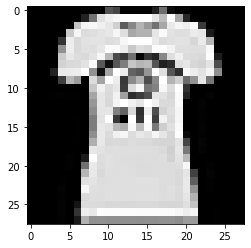

In [9]:
# We will now visualise some images

# We will take any random index between 1 and 60,000
index = random.randint(1, 60000)
plt.imshow(training[index, 1:].reshape((28, 28)), cmap='gray') # reshape and plot the image

print(f"label of the image is : {training[index, 0]}")

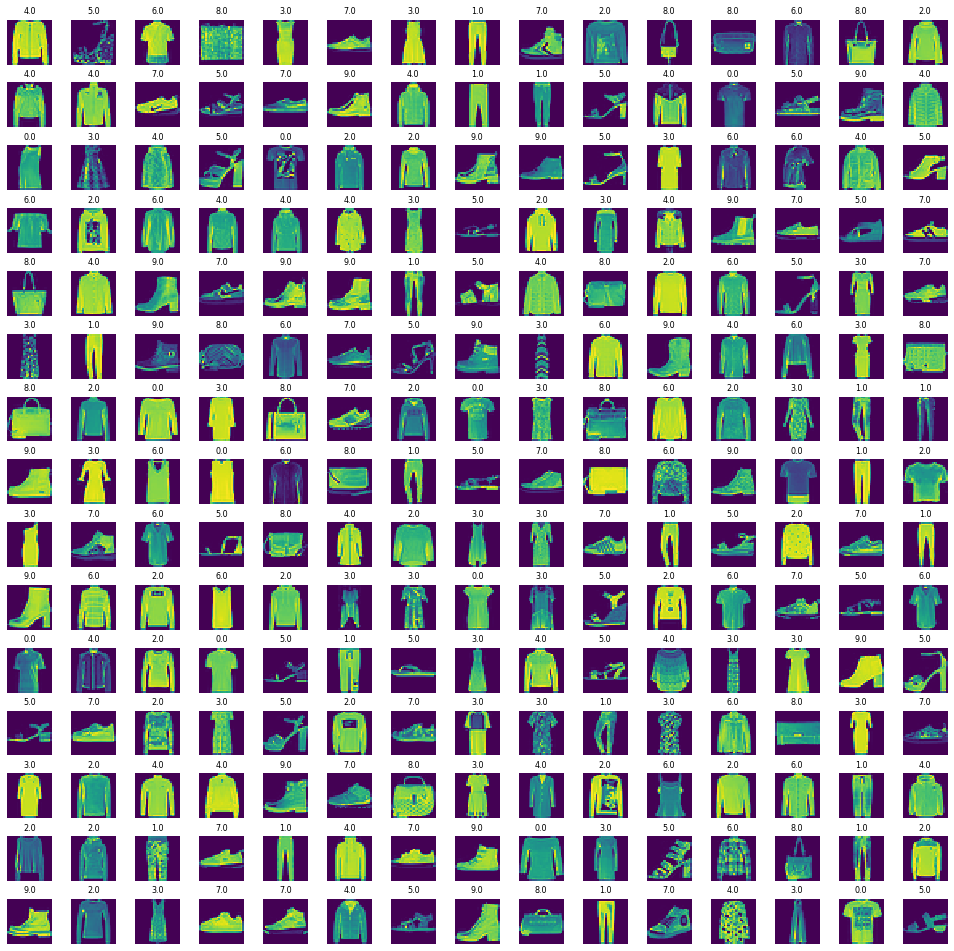

In [10]:
# Now we will view more images in a grid format

# dimensions of the grid we want to view
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17, 17))

# flatten the 15 X 15 matrix into 225 array
axes = axes.ravel()

# Length of the training array
n_training = len(training)

# In order to plot it sequentially (all 225 images)
for i in np.arange(0, W_grid * L_grid):
    
    # Select a random number
    index = random.randint(0, n_training)
    # Read and display an image with selected index
    axes[i].imshow(training[index, 1:].reshape((28, 28)))
    axes[i].set_title(training[index, 0], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

### Build and Train the CNN Model

In [11]:
# lets preapre the training and test data

X_train = training[:, 1:]/255 # We standardize all pixels
y_train = training[:, 0]

X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [12]:
# Check the shape of the training features and testing features

print(f"Shape of training features : {X_train.shape}")
print(f"Shape of training labels : {y_train.shape}")

Shape of training features : (60000, 784)
Shape of training labels : (60000,)


In [13]:
# We will now do a tuple unpacking and prepare the training features and testing features in the format acceptable to a CNN

X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

print(f"Shape of training features : {X_train.shape}")
print(f"Shape of testing features : {X_test.shape}")
print(f"Shape of training labels : {y_train.shape}")
print(f"Shape of testing labels : {y_test.shape}")

Shape of training features : (60000, 28, 28, 1)
Shape of testing features : (10000, 28, 28, 1)
Shape of training labels : (60000,)
Shape of testing labels : (10000,)


In [14]:
# NN Model Constants

INPUT_FEATURE_DETECTORS_COUNT = 32
HIDDEN_FEATURE_DETECTORS_COUNT = 64
HIDDEN_LAYER_UNITS = 64
OUTPUT_LAYER_UNITS = 10
FEATURE_DETECTORS_DIMENSION = (3, 3)
INPUT_SHAPE = X_train.shape[1: ]
POOL_SIZE = (2, 2)

HIDDEN_LAYER_ACTIVATIONS = tf.keras.activations.relu
OUTPUT_LAYER_ACTIVATION = tf.keras.activations.softmax
OPTIMIZER_FUNCTION = tf.keras.optimizers.Adam()
LOSS_FUNCTION = tf.keras.losses.SparseCategoricalCrossentropy()
METRICS_PARAM = ['accuracy']

BATCH_SIZE = 512
EPOCHS = 150

In [15]:
# Build and Compile the CNN

model = tf.keras.models.Sequential()

# First layer with first layer pooling
model.add(tf.keras.layers.Conv2D(INPUT_FEATURE_DETECTORS_COUNT, FEATURE_DETECTORS_DIMENSION, 
                                 activation=HIDDEN_LAYER_ACTIVATIONS, input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=POOL_SIZE))

# Second layer with second layer pooling
model.add(tf.keras.layers.Conv2D(INPUT_FEATURE_DETECTORS_COUNT, FEATURE_DETECTORS_DIMENSION, 
                               activation=HIDDEN_LAYER_ACTIVATIONS))
model.add(tf.keras.layers.MaxPooling2D(pool_size=POOL_SIZE))

# Flatten the output for input to ANN
model.add(tf.keras.layers.Flatten())

# ANN fully connected layer
model.add(tf.keras.layers.Dense(HIDDEN_LAYER_UNITS, activation=HIDDEN_LAYER_ACTIVATIONS))

# Output layer
model.add(tf.keras.layers.Dense(units=OUTPUT_LAYER_UNITS, activation=OUTPUT_LAYER_ACTIVATION))

# Compile the model
model.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER_FUNCTION, metrics=METRICS_PARAM)

# View the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                51264     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [16]:
# Lets train the model

model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1)

Train on 60000 samples
Epoch 1/150
60000/60000 [==============================] - 9s 154us/sample - loss: 0.8828 - accuracy: 0.6903
Epoch 2/150
60000/60000 [==============================] - 1s 12us/sample - loss: 0.4996 - accuracy: 0.8194
Epoch 3/150
60000/60000 [==============================] - 1s 12us/sample - loss: 0.4325 - accuracy: 0.8447
Epoch 4/150
60000/60000 [==============================] - 1s 12us/sample - loss: 0.4016 - accuracy: 0.8566
Epoch 5/150
60000/60000 [==============================] - 1s 12us/sample - loss: 0.3762 - accuracy: 0.8662
Epoch 6/150
60000/60000 [==============================] - 1s 12us/sample - loss: 0.3568 - accuracy: 0.8728
Epoch 7/150
60000/60000 [==============================] - 1s 12us/sample - loss: 0.3448 - accuracy: 0.8773
Epoch 8/150
60000/60000 [==============================] - 1s 12us/sample - loss: 0.3286 - accuracy: 0.8826
Epoch 9/150
60000/60000 [==============================] - 1s 12us/sample - loss: 0.3238 - accuracy: 0.8837
Epoc

60000/60000 [==============================] - 1s 12us/sample - loss: 0.0979 - accuracy: 0.9646
Epoch 77/150
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0906 - accuracy: 0.9678
Epoch 78/150
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0944 - accuracy: 0.9664
Epoch 79/150
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0918 - accuracy: 0.9674
Epoch 80/150
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0882 - accuracy: 0.9690
Epoch 81/150
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0912 - accuracy: 0.9674
Epoch 82/150
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0838 - accuracy: 0.9699
Epoch 83/150
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0861 - accuracy: 0.9681
Epoch 84/150
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0838 - accuracy: 0.9703
Epoch 85/150
60000/60000 [======

60000/60000 [==============================] - 1s 12us/sample - loss: 0.0174 - accuracy: 0.9952


### Evaluate the model

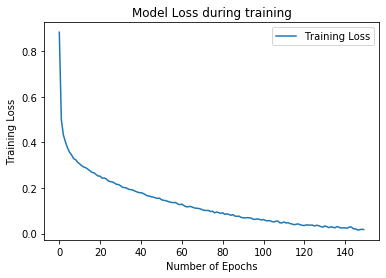

In [17]:
# Visualize the Model Loss

plt.plot(model.history.history['loss'])
plt.title("Model Loss during training")
plt.xlabel("Number of Epochs")
plt.ylabel("Training Loss")
plt.legend(['Training Loss'])

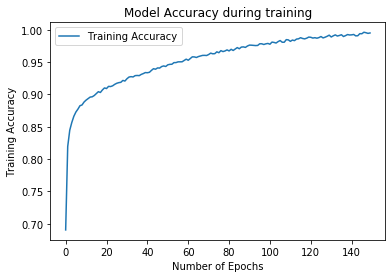

In [18]:
# Visualize the Model Accuracy

plt.plot(model.history.history['accuracy'])
plt.title("Model Accuracy during training")
plt.xlabel("Number of Epochs")
plt.ylabel("Training Accuracy")
plt.legend(['Training Accuracy'])

In [19]:
# Lets run predictions using this model

evaluation = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy : {evaluation[1]}")

Test Accuracy : 0.9118000268936157


In [20]:
# Now get the predictions on the test data
predicted_classes = model.predict_classes(X_test)

Also print the Confusion Matrix
[[832   3  17  23   6   1 108   1   9   0]
 [  1 988   0   7   1   1   1   0   1   0]
 [ 21   1 836   7  72   1  59   0   3   0]
 [ 16  11   6 920  22   3  21   0   1   0]
 [  2   1  22  22 889   1  63   0   0   0]
 [  0   0   0   0   0 979   0  16   2   3]
 [ 84   1  44  30  50   0 782   1   8   0]
 [  0   0   0   0   0  11   0 961   0  28]
 [  2   1   1   4   0   3   7   3 977   2]
 [  0   0   0   0   0   6   0  40   0 954]]


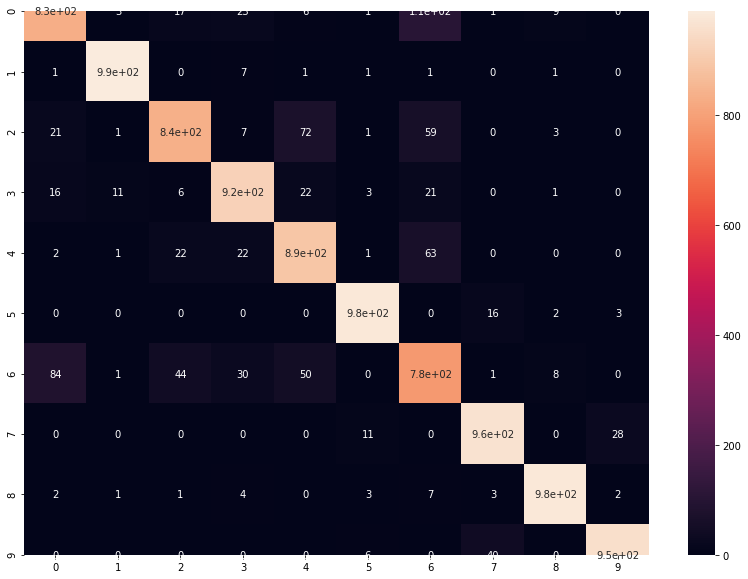

In [21]:
# We will build the confusion matrix and plot the same

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True)

print("Also print the Confusion Matrix")
print(cm)

In [22]:
# Print the classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      1000
         1.0       0.98      0.99      0.99      1000
         2.0       0.90      0.84      0.87      1000
         3.0       0.91      0.92      0.91      1000
         4.0       0.85      0.89      0.87      1000
         5.0       0.97      0.98      0.98      1000
         6.0       0.75      0.78      0.77      1000
         7.0       0.94      0.96      0.95      1000
         8.0       0.98      0.98      0.98      1000
         9.0       0.97      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



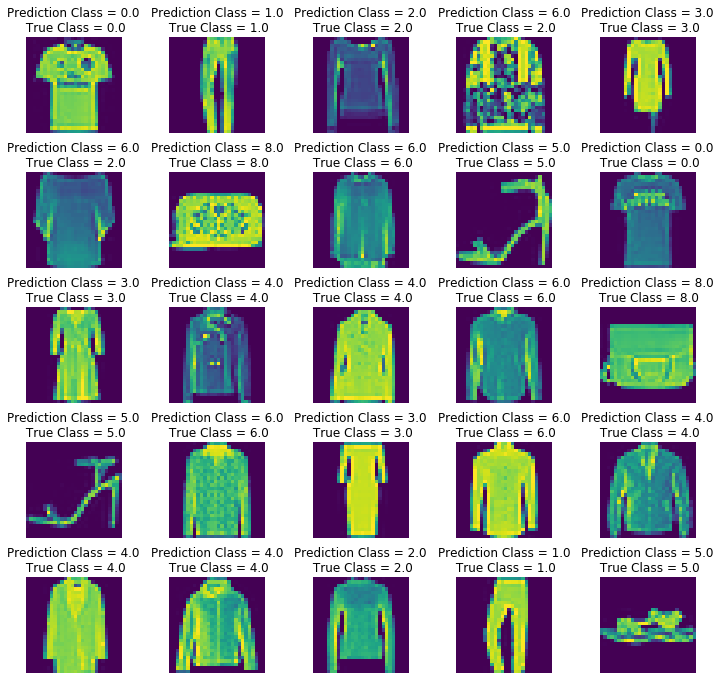

In [23]:
# Now we will display 5 from the test classes with predictions and actual

L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
